In [371]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


In [412]:
LR = 5e-4
batch_size = 4
epochs = 70
patience = 10
dropout = 0.3
model_name = f'best_model_6_lr{LR:.0e}_b{batch_size}_do{dropout}'


input_shape = (240, 240, 3)
num_classes = 6
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_283 (Conv2D)         (None, 240, 240, 32)      896       
                                                                 
 max_pooling2d_249 (MaxPooli  (None, 120, 120, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_284 (Conv2D)         (None, 120, 120, 32)      9248      
                                                                 
 max_pooling2d_250 (MaxPooli  (None, 60, 60, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_285 (Conv2D)         (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_251 (MaxPooli  (None, 30, 30, 64)     

In [413]:
train_generator = ImageDataGenerator(
        rotation_range=90,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=3,
        brightness_range=(0.5, 1),
        zoom_range=[0.8, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

valid_generator = ImageDataGenerator(
        rotation_range=40,
        brightness_range=(0.5, 1),
        zoom_range=[0.8, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

train_flow = train_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/train',
        shuffle=True,
        target_size=(240, 240),
    )

valid_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/valid',
        shuffle=True,
        target_size=(240, 240),
    )

test_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'datasets/test',
        shuffle=False,
        target_size=(240, 240),
    )

Found 451 images belonging to 6 classes.
Found 57 images belonging to 6 classes.
Found 56 images belonging to 6 classes.


In [414]:
STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(f'trained_models/{model_name}', save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
history = model.fit(train_flow,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_flow,
            validation_steps=STEP_SIZE_VALID,
            epochs=epochs,
            callbacks=[stop_early, checkpoint],
)

Epoch 1/70
112/112 [==============================] - ETA: 0s - loss: 1.9107 - accuracy: 0.1633

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 12s 104ms/step - loss: 1.9107 - accuracy: 0.1633 - val_loss: 1.7826 - val_accuracy: 0.3036
Epoch 2/70
112/112 [==============================] - 8s 71ms/step - loss: 1.7793 - accuracy: 0.2260 - val_loss: 1.7907 - val_accuracy: 0.1071
Epoch 3/70
112/112 [==============================] - ETA: 0s - loss: 1.7573 - accuracy: 0.2304

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 11s 98ms/step - loss: 1.7573 - accuracy: 0.2304 - val_loss: 1.7725 - val_accuracy: 0.1607
Epoch 4/70
112/112 [==============================] - 8s 73ms/step - loss: 1.7309 - accuracy: 0.2416 - val_loss: 1.7755 - val_accuracy: 0.2143
Epoch 5/70
112/112 [==============================] - 8s 73ms/step - loss: 1.7684 - accuracy: 0.1991 - val_loss: 1.7789 - val_accuracy: 0.1607
Epoch 6/70
112/112 [==============================] - ETA: 0s - loss: 1.7833 - accuracy: 0.1812

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 89ms/step - loss: 1.7833 - accuracy: 0.1812 - val_loss: 1.7465 - val_accuracy: 0.2500
Epoch 7/70
112/112 [==============================] - 8s 72ms/step - loss: 1.7796 - accuracy: 0.2036 - val_loss: 1.7868 - val_accuracy: 0.2321
Epoch 8/70
112/112 [==============================] - 8s 73ms/step - loss: 1.7948 - accuracy: 0.2036 - val_loss: 1.7932 - val_accuracy: 0.1786
Epoch 9/70
112/112 [==============================] - 8s 73ms/step - loss: 1.7898 - accuracy: 0.2237 - val_loss: 1.7668 - val_accuracy: 0.1786
Epoch 10/70
112/112 [==============================] - ETA: 0s - loss: 1.7524 - accuracy: 0.2215

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 17s 156ms/step - loss: 1.7524 - accuracy: 0.2215 - val_loss: 1.6824 - val_accuracy: 0.3393
Epoch 11/70
112/112 [==============================] - ETA: 0s - loss: 1.6999 - accuracy: 0.2662

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 15s 137ms/step - loss: 1.6999 - accuracy: 0.2662 - val_loss: 1.4616 - val_accuracy: 0.3393
Epoch 12/70
112/112 [==============================] - ETA: 0s - loss: 1.5541 - accuracy: 0.3400

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 90ms/step - loss: 1.5541 - accuracy: 0.3400 - val_loss: 1.2070 - val_accuracy: 0.5536
Epoch 13/70
112/112 [==============================] - 9s 78ms/step - loss: 1.6554 - accuracy: 0.3177 - val_loss: 1.7084 - val_accuracy: 0.2857
Epoch 14/70
112/112 [==============================] - 8s 73ms/step - loss: 1.6785 - accuracy: 0.2438 - val_loss: 1.5377 - val_accuracy: 0.3036
Epoch 15/70
112/112 [==============================] - ETA: 0s - loss: 1.5308 - accuracy: 0.3221

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 88ms/step - loss: 1.5308 - accuracy: 0.3221 - val_loss: 1.1433 - val_accuracy: 0.5536
Epoch 16/70
112/112 [==============================] - 8s 72ms/step - loss: 1.3045 - accuracy: 0.4743 - val_loss: 1.2943 - val_accuracy: 0.4643
Epoch 17/70
112/112 [==============================] - ETA: 0s - loss: 1.1425 - accuracy: 0.4698

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 89ms/step - loss: 1.1425 - accuracy: 0.4698 - val_loss: 1.0297 - val_accuracy: 0.6429
Epoch 18/70
112/112 [==============================] - ETA: 0s - loss: 1.0400 - accuracy: 0.5034

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 90ms/step - loss: 1.0400 - accuracy: 0.5034 - val_loss: 0.8436 - val_accuracy: 0.5714
Epoch 19/70
112/112 [==============================] - 8s 73ms/step - loss: 0.9453 - accuracy: 0.5481 - val_loss: 1.3185 - val_accuracy: 0.5179
Epoch 20/70
112/112 [==============================] - 8s 73ms/step - loss: 0.9641 - accuracy: 0.5705 - val_loss: 0.9057 - val_accuracy: 0.5536
Epoch 21/70
112/112 [==============================] - 8s 72ms/step - loss: 0.9792 - accuracy: 0.5503 - val_loss: 0.8666 - val_accuracy: 0.5357
Epoch 22/70
112/112 [==============================] - 8s 73ms/step - loss: 0.9236 - accuracy: 0.5503 - val_loss: 0.9165 - val_accuracy: 0.6964
Epoch 23/70
112/112 [==============================] - ETA: 0s - loss: 0.9422 - accuracy: 0.5638

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 13s 118ms/step - loss: 0.9422 - accuracy: 0.5638 - val_loss: 0.7172 - val_accuracy: 0.6250
Epoch 24/70
112/112 [==============================] - 12s 94ms/step - loss: 0.8146 - accuracy: 0.6085 - val_loss: 0.9080 - val_accuracy: 0.6429
Epoch 25/70
112/112 [==============================] - 8s 72ms/step - loss: 0.8937 - accuracy: 0.5794 - val_loss: 0.9447 - val_accuracy: 0.6250
Epoch 26/70
112/112 [==============================] - 8s 72ms/step - loss: 0.8100 - accuracy: 0.6309 - val_loss: 0.8019 - val_accuracy: 0.5893
Epoch 27/70
112/112 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.7159

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 11s 99ms/step - loss: 0.6943 - accuracy: 0.7159 - val_loss: 0.6461 - val_accuracy: 0.6786
Epoch 28/70
112/112 [==============================] - 9s 76ms/step - loss: 0.7263 - accuracy: 0.6846 - val_loss: 1.0749 - val_accuracy: 0.4643
Epoch 29/70
112/112 [==============================] - 8s 75ms/step - loss: 1.0104 - accuracy: 0.5570 - val_loss: 0.7458 - val_accuracy: 0.6607
Epoch 30/70
112/112 [==============================] - ETA: 0s - loss: 0.8647 - accuracy: 0.6107

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 90ms/step - loss: 0.8647 - accuracy: 0.6107 - val_loss: 0.6247 - val_accuracy: 0.7143
Epoch 31/70
112/112 [==============================] - 9s 79ms/step - loss: 1.0276 - accuracy: 0.5682 - val_loss: 0.9218 - val_accuracy: 0.6786
Epoch 32/70
112/112 [==============================] - 8s 75ms/step - loss: 0.8153 - accuracy: 0.6801 - val_loss: 0.8488 - val_accuracy: 0.5714
Epoch 33/70
112/112 [==============================] - 8s 74ms/step - loss: 0.9135 - accuracy: 0.6264 - val_loss: 1.1516 - val_accuracy: 0.5357
Epoch 34/70
112/112 [==============================] - 8s 73ms/step - loss: 0.7650 - accuracy: 0.6823 - val_loss: 0.8980 - val_accuracy: 0.5714
Epoch 35/70
112/112 [==============================] - 8s 73ms/step - loss: 0.7841 - accuracy: 0.5996 - val_loss: 0.6663 - val_accuracy: 0.6071
Epoch 36/70
112/112 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.6667

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 90ms/step - loss: 0.6736 - accuracy: 0.6667 - val_loss: 0.4751 - val_accuracy: 0.6964
Epoch 37/70
112/112 [==============================] - 8s 74ms/step - loss: 0.7273 - accuracy: 0.6711 - val_loss: 0.5956 - val_accuracy: 0.7321
Epoch 38/70
112/112 [==============================] - 8s 74ms/step - loss: 0.6320 - accuracy: 0.7047 - val_loss: 0.5627 - val_accuracy: 0.7321
Epoch 39/70
112/112 [==============================] - 9s 78ms/step - loss: 0.6129 - accuracy: 0.7271 - val_loss: 0.7498 - val_accuracy: 0.5893
Epoch 40/70
112/112 [==============================] - 8s 73ms/step - loss: 0.6930 - accuracy: 0.7002 - val_loss: 0.6985 - val_accuracy: 0.6429
Epoch 41/70
112/112 [==============================] - 9s 75ms/step - loss: 0.6220 - accuracy: 0.7114 - val_loss: 0.4945 - val_accuracy: 0.7321
Epoch 42/70
112/112 [==============================] - ETA: 0s - loss: 0.6193 - accuracy: 0.7025

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 12s 105ms/step - loss: 0.6193 - accuracy: 0.7025 - val_loss: 0.4107 - val_accuracy: 0.8036
Epoch 43/70
112/112 [==============================] - 9s 76ms/step - loss: 0.6375 - accuracy: 0.6980 - val_loss: 0.5271 - val_accuracy: 0.7143
Epoch 44/70
112/112 [==============================] - 8s 75ms/step - loss: 0.6119 - accuracy: 0.7606 - val_loss: 0.6907 - val_accuracy: 0.6071
Epoch 45/70
112/112 [==============================] - 9s 77ms/step - loss: 0.7265 - accuracy: 0.6555 - val_loss: 0.7274 - val_accuracy: 0.6250
Epoch 46/70
112/112 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.7696

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 11s 94ms/step - loss: 0.5309 - accuracy: 0.7696 - val_loss: 0.4103 - val_accuracy: 0.7679
Epoch 47/70
112/112 [==============================] - 10s 88ms/step - loss: 0.4772 - accuracy: 0.7696 - val_loss: 0.5843 - val_accuracy: 0.7143
Epoch 48/70
112/112 [==============================] - 8s 75ms/step - loss: 0.5440 - accuracy: 0.7763 - val_loss: 0.4466 - val_accuracy: 0.8036
Epoch 49/70
112/112 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.7405

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 93ms/step - loss: 0.6173 - accuracy: 0.7405 - val_loss: 0.3232 - val_accuracy: 0.8393
Epoch 50/70
112/112 [==============================] - ETA: 0s - loss: 0.4040 - accuracy: 0.8031

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 92ms/step - loss: 0.4040 - accuracy: 0.8031 - val_loss: 0.3027 - val_accuracy: 0.8214
Epoch 51/70
112/112 [==============================] - 9s 76ms/step - loss: 0.4570 - accuracy: 0.7785 - val_loss: 0.4198 - val_accuracy: 0.7679
Epoch 52/70
112/112 [==============================] - 9s 76ms/step - loss: 0.3680 - accuracy: 0.8233 - val_loss: 0.4562 - val_accuracy: 0.8393
Epoch 53/70
112/112 [==============================] - 9s 80ms/step - loss: 0.8164 - accuracy: 0.7047 - val_loss: 0.4631 - val_accuracy: 0.7857
Epoch 54/70
112/112 [==============================] - 8s 74ms/step - loss: 0.5618 - accuracy: 0.7606 - val_loss: 0.5082 - val_accuracy: 0.8036
Epoch 55/70
112/112 [==============================] - 9s 77ms/step - loss: 0.4375 - accuracy: 0.8076 - val_loss: 0.3478 - val_accuracy: 0.9107
Epoch 56/70
112/112 [==============================] - ETA: 0s - loss: 0.3253 - accuracy: 0.8747

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 90ms/step - loss: 0.3253 - accuracy: 0.8747 - val_loss: 0.2650 - val_accuracy: 0.8036
Epoch 57/70
112/112 [==============================] - 9s 78ms/step - loss: 0.6251 - accuracy: 0.7606 - val_loss: 0.8118 - val_accuracy: 0.6429
Epoch 58/70
112/112 [==============================] - 8s 75ms/step - loss: 1.7350 - accuracy: 0.2617 - val_loss: 1.4917 - val_accuracy: 0.3036
Epoch 59/70
112/112 [==============================] - 8s 72ms/step - loss: 1.0555 - accuracy: 0.5302 - val_loss: 0.9524 - val_accuracy: 0.6071
Epoch 60/70
112/112 [==============================] - 8s 74ms/step - loss: 0.5962 - accuracy: 0.7472 - val_loss: 0.3382 - val_accuracy: 0.8571
Epoch 61/70
112/112 [==============================] - 9s 80ms/step - loss: 0.5259 - accuracy: 0.7629 - val_loss: 0.4170 - val_accuracy: 0.8571
Epoch 62/70
112/112 [==============================] - 9s 83ms/step - loss: 0.5027 - accuracy: 0.8322 - val_loss: 0.5474 - val_accuracy: 0.8393
Epo

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 10s 91ms/step - loss: 0.4075 - accuracy: 0.8635 - val_loss: 0.2427 - val_accuracy: 0.9107
Epoch 64/70
112/112 [==============================] - 8s 73ms/step - loss: 0.3790 - accuracy: 0.8635 - val_loss: 0.3271 - val_accuracy: 0.8929
Epoch 65/70
112/112 [==============================] - 9s 76ms/step - loss: 0.5955 - accuracy: 0.8568 - val_loss: 0.3975 - val_accuracy: 0.8393
Epoch 66/70
112/112 [==============================] - 8s 75ms/step - loss: 0.4360 - accuracy: 0.8367 - val_loss: 0.4834 - val_accuracy: 0.8571
Epoch 67/70
112/112 [==============================] - ETA: 0s - loss: 0.3566 - accuracy: 0.8702

INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


INFO:tensorflow:Assets written to: trained_models\best_model_6_lr5e-04_b4_do0.3\assets


112/112 [==============================] - 11s 97ms/step - loss: 0.3566 - accuracy: 0.8702 - val_loss: 0.1556 - val_accuracy: 0.9643
Epoch 68/70
112/112 [==============================] - 9s 78ms/step - loss: 0.2118 - accuracy: 0.9262 - val_loss: 0.2914 - val_accuracy: 0.8393
Epoch 69/70
112/112 [==============================] - 8s 75ms/step - loss: 0.3537 - accuracy: 0.8926 - val_loss: 0.4056 - val_accuracy: 0.8393
Epoch 70/70
112/112 [==============================] - 9s 81ms/step - loss: 0.2215 - accuracy: 0.9284 - val_loss: 0.2344 - val_accuracy: 0.8929


In [421]:
# Save training history
hist_df = pd.DataFrame(history.history) 
hist_csv_file = f'trained_models/{model_name}/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [422]:
model = tf.keras.models.load_model('trained_models/' + model_name) #model_name

test_flow.reset()

scores = model.evaluate(test_flow)

print("%s%s: %.2f%%" % ("evaluate ", model.metrics_names[1], scores[1]*100))

14/14 [==============================] - 1s 58ms/step - loss: 0.2013 - accuracy: 0.9643
evaluate accuracy: 96.43%


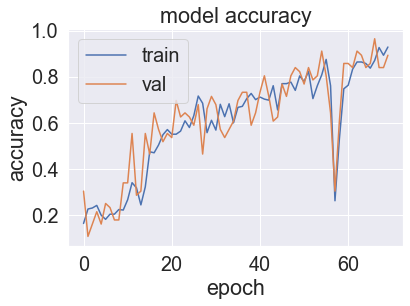

In [423]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

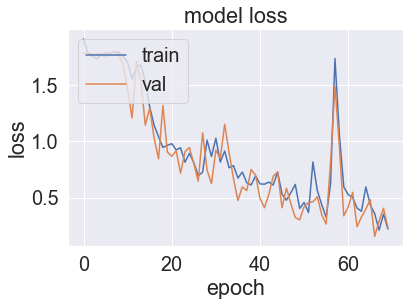

In [424]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [425]:
CLASSES = []
for subdir in os.listdir('raw_datasets'):
    CLASSES.append(subdir)
    
print(CLASSES)
    
index = 2
img_num = 34

TEST_IMAGES = []
TEST_LABELS = []
for subdir in os.listdir('datasets/test'):
    for file in os.listdir(os.path.join('datasets', 'test', subdir)):
        TEST_IMAGES.append(np.asarray(Image.open(f'datasets/test/{subdir}/{file}')).astype(np.float32)/255.)
        TEST_LABELS.append(CLASSES.index(subdir))
        
TEST_IMAGES = np.asarray(TEST_IMAGES)
TEST_LABELS = np.asarray(TEST_LABELS)
        
img = np.asarray(Image.open(f'raw_datasets/{CLASSES[index]}/{img_num}.jpg')).astype(np.float32)/255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(CLASSES[np.argmax(pred)])

['gray painted wood', 'gray rug', 'gray wood', 'light brown wood', 'rubber stairs', 'stone tile']
1/1 [==============================] - 0s 111ms/step
gray rug


{'gray painted wood': 0, 'gray rug': 1, 'gray wood': 2, 'light brown wood': 3, 'rubber stairs': 4, 'stone tile': 5}
2/2 [==============================] - 0s 177ms/step


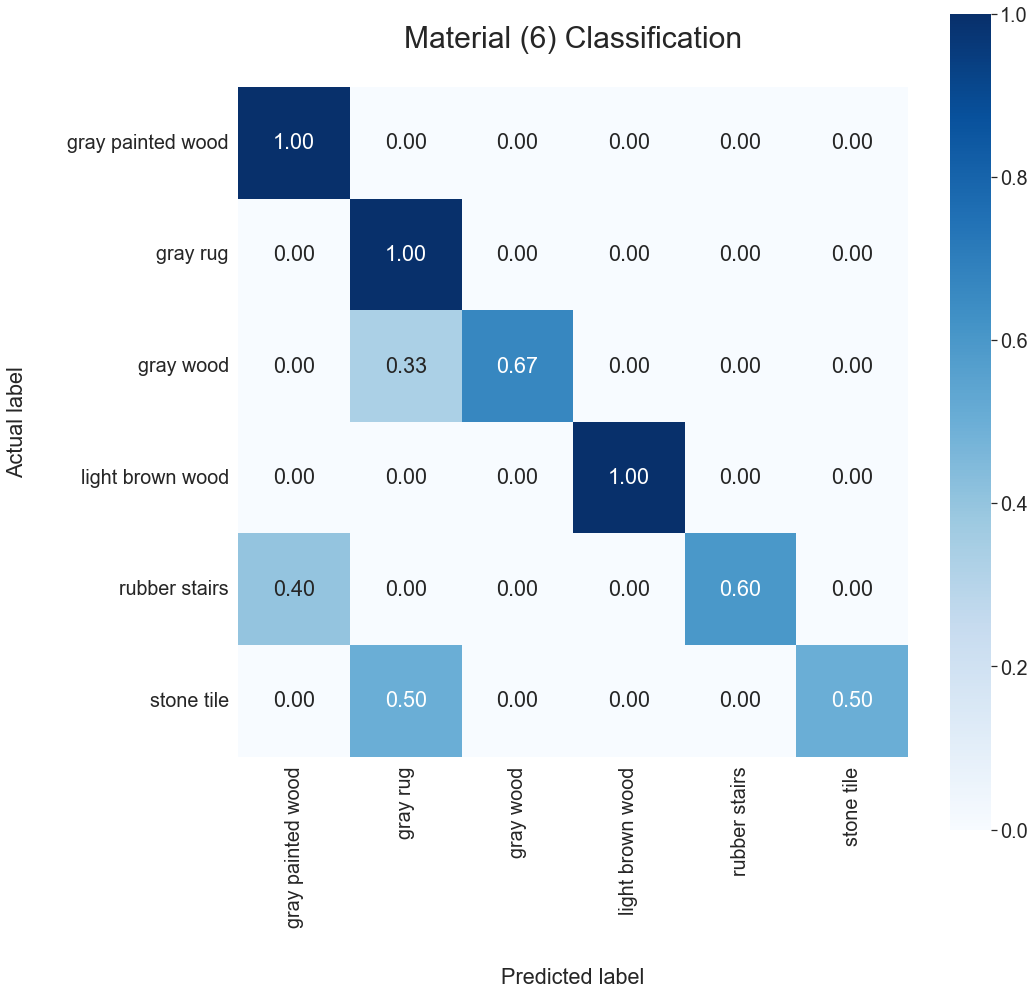

In [426]:
file_name = f'./confusion_matrix/confusion_matrix_{num_classes}class_{model_name}'
title = f'Material (6) Classification'

if not os.path.exists('./confusion_matrix'):
  os.mkdir('./confusion_matrix')

test_labels = test_flow.class_indices
print(test_labels)
predictions = tf.math.argmax(model.predict(TEST_IMAGES), axis=1)
cf = tf.math.confusion_matrix(TEST_LABELS, predictions).numpy()
cf = cf / cf.sum(axis=1)[:, np.newaxis]
df = pd.DataFrame(cf, index=CLASSES, columns=CLASSES)
plt.figure(figsize=(15, 15))
sn.set(font_scale=1.8)
hm = sn.heatmap(df, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xlabel('Predicted label', labelpad=40)
plt.ylabel('Actual label', labelpad=40)
plt.title(title, y=1.03, pad=20, fontsize=30)
plt.savefig(file_name + '_transparent.png', transparent=True)
plt.savefig(file_name + '_white.png', transparent=False, facecolor='white')